#Demonstration: Training Pre-trained CNN models on Small Dataset



##Scenario:
- A deep learning engineer wants to evaluate which pretrained CNN model—MobileNetV2, ResNet50, or EfficientNetB0—performs best when trained on a small, real-world dataset, to guide model selection for low-data image classification tasks.

##Importing Libraries

In [21]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# Load flowers dataset
dataset, info = tfds.load('tf_flowers', with_info=True, as_supervised=True)
class_names = info.features['label'].names

# Preprocess function
IMG_SIZE = 160
def format_example(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE)) / 255.0
    return image, label

# Split
train_ds = dataset['train'].take(360).map(format_example).batch(32)
val_ds = dataset['train'].skip(360).take(300).map(format_example).batch(32)
test_ds = dataset['train'].skip(660).map(format_example).batch(32)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/tf_flowers/incomplete.7EIB2F_3.0.1/tf_flowers-train.tfrecord*...:   0%|   …

Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.


In [32]:
def build_model(base_model, name="Model"):
    base_model.trainable = False
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.4),
        layers.Dense(5, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    model._name = name
    return model

##Training model: mobilenet

In [23]:
mobilenet = tf.keras.applications.MobileNetV2(
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False,
    weights='imagenet'
)
model_mobilenet = build_model(mobilenet, "MobileNetV2")

history_mobilenet = model_mobilenet.fit(train_ds, validation_data=val_ds, epochs=10)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.3751 - loss: 1.7068 - val_accuracy: 0.7567 - val_loss: 0.7035
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.8465 - loss: 0.5129 - val_accuracy: 0.8167 - val_loss: 0.5293
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.8877 - loss: 0.3576 - val_accuracy: 0.8267 - val_loss: 0.4812
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.9236 - loss: 0.2474 - val_accuracy: 0.8633 - val_loss: 0.4132
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.9783 - loss: 0.1413 - val_accuracy: 0.8600 - val_loss: 0.4127
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.9709 - loss: 0.1329 - val_accuracy: 0.8500 - val_loss: 0.4222
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.9728 - loss: 0.1186 - val_accuracy: 0.8500 - val_loss: 0.4058
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.9831 

##Training model: resnet

In [24]:
resnet = tf.keras.applications.ResNet50(
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False,
    weights='imagenet'
)
model_resnet = build_model(resnet, "ResNet50")

history_resnet = model_resnet.fit(train_ds, validation_data=val_ds, epochs=10)


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 85s 7s/step - accuracy: 0.2522 - loss: 1.6745 - val_accuracy: 0.3500 - val_loss: 1.5295
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 62s 5s/step - accuracy: 0.2170 - loss: 1.6976 - val_accuracy: 0.3900 - val_loss: 1.5145
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 96s 6s/step - accuracy: 0.2502 - loss: 1.5908 - val_accuracy: 0.3767 - val_loss: 1.5102
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 55s 5s/step - accuracy: 0.2926 - loss: 1.5475 - val_accuracy: 0.4167 - val_loss: 1.4982
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 98s 6s/step - accuracy: 0.2301 - loss: 1.5679 - val_accuracy: 0.4200 - val_loss: 1.4849
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 84s 6s/step - accuracy: 0.3156 - loss: 1.5419 - val_accuracy: 0.4300 - val_loss: 1.4804
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 79s 6s/step - accuracy: 0.3083 - loss: 1.5213 - val_accuracy: 0.3900 - val_loss: 1.4717
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 54s 5s/step - accuracy: 0.321

##Training model: efficientnet

In [25]:
efficientnet = tf.keras.applications.EfficientNetB0(
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False,
    weights='imagenet'
)
model_effnet = build_model(efficientnet, "EfficientNetB0")

history_effnet = model_effnet.fit(train_ds, validation_data=val_ds, epochs=10)


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.1984 - loss: 1.6708 - val_accuracy: 0.3000 - val_loss: 1.5875
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 32s 3s/step - accuracy: 0.1925 - loss: 1.6450 - val_accuracy: 0.3000 - val_loss: 1.5969
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.2193 - loss: 1.6385 - val_accuracy: 0.3000 - val_loss: 1.5839
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.1613 - loss: 1.6272 - val_accuracy: 0.3000 - val_loss: 1.5914
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.2041 - loss: 1.6083 - val_accuracy: 0.3000 - val_loss: 1.5916
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.1428 - loss: 1.6136 - val_accuracy: 0.3000 - val_loss: 1.5958
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.1984 - loss: 1.6030 - val_accuracy: 0.3000 - val_loss: 1.5846
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 33s 3s/step - accuracy: 0.205

##Plotting Comparison Graph

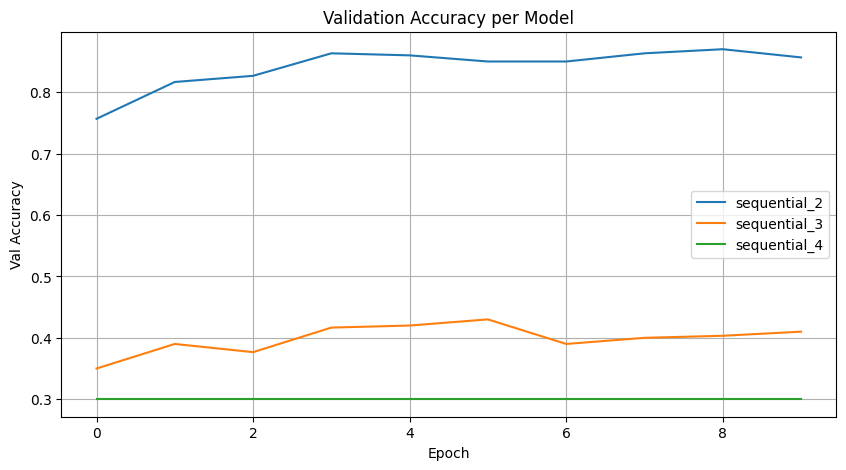

In [26]:
def plot_accuracies(histories):
    plt.figure(figsize=(10, 5))
    for hist in histories:
        plt.plot(hist.history['val_accuracy'], label=f"{hist.model.name}")
    plt.title("Validation Accuracy per Model")
    plt.xlabel("Epoch")
    plt.ylabel("Val Accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_accuracies([history_mobilenet, history_resnet, history_effnet])


##Visualizing Predictions

In [28]:
def show_predictions(model, dataset, num_images=5):
    for images, labels in dataset.take(1):
        preds = model.predict(images)
        for i in range(num_images):
            plt.figure(figsize=(4,2))
            plt.imshow(images[i])
            plt.title(f"True: {class_names[labels[i]]} | Pred: {class_names[np.argmax(preds[i])]}")
            plt.axis("off")
            plt.show()

# Try all
show_predictions(model_mobilenet, test_ds)
show_predictions(model_resnet, test_ds)
show_predictions(model_effnet, test_ds)


##Mobilenet Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 989ms/step


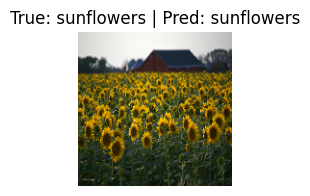

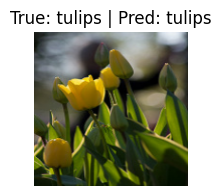

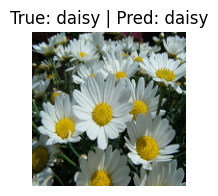

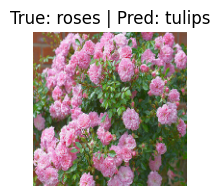

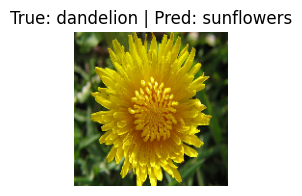

In [29]:
show_predictions(model_mobilenet, test_ds)

##Resnet Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


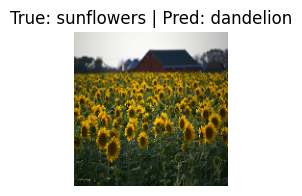

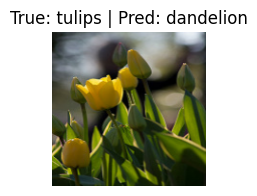

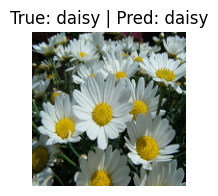

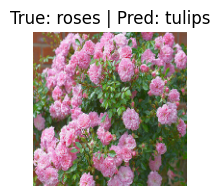

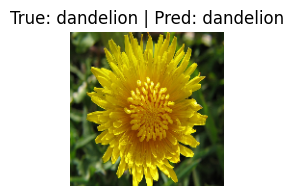

In [30]:
show_predictions(model_resnet, test_ds)

##Efficientnet Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


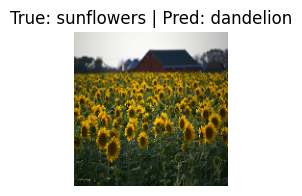

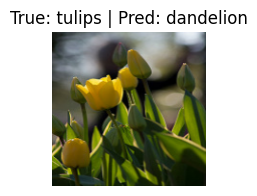

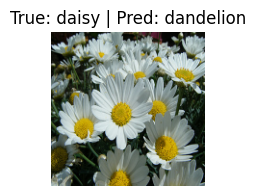

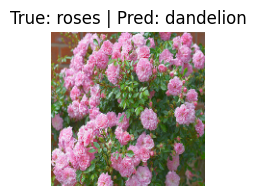

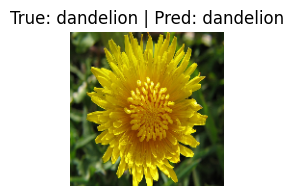

In [31]:
show_predictions(model_effnet, test_ds)